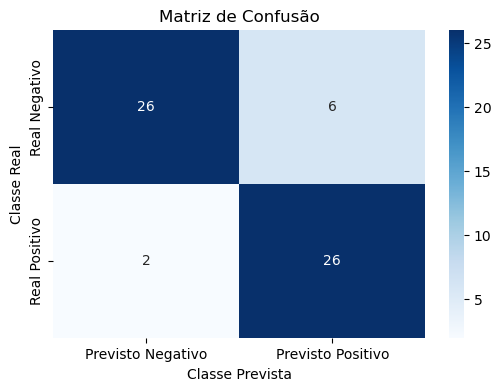

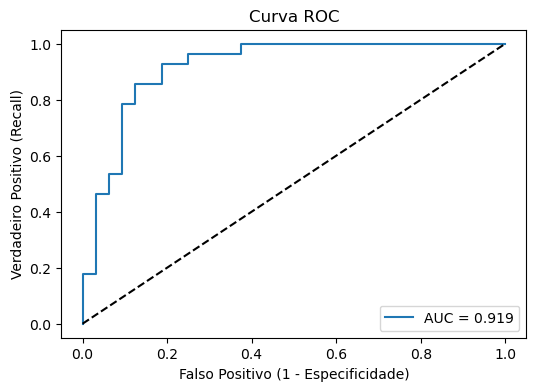


Métricas extraídas da matriz de confusão:
Acurácia      : 0.867
Precisão      : 0.812
Revocação     : 0.929
F1-Score      : 0.867
MCC           : 0.741
AUC-ROC       : 0.919


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1. Gerando dataset
X, y = make_classification(n_samples=200, n_features=5, n_classes=2, random_state=42)

# 2. Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modelo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 4. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# --- Gráfico 1: Matriz de confusão ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Previsto Negativo", "Previsto Positivo"],
            yticklabels=["Real Negativo", "Real Positivo"])
plt.title("Matriz de Confusão")
plt.ylabel("Classe Real")
plt.xlabel("Classe Prevista")
plt.show()

# --- Gráfico 2: Curva ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")  # linha de referência
plt.xlabel("Falso Positivo (1 - Especificidade)")
plt.ylabel("Verdadeiro Positivo (Recall)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# 5. Métricas
print("\nMétricas extraídas da matriz de confusão:")
print(f"Acurácia      : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precisão      : {precision_score(y_test, y_pred):.3f}")
print(f"Revocação     : {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score      : {f1_score(y_test, y_pred):.3f}")
print(f"MCC           : {matthews_corrcoef(y_test, y_pred):.3f}")
print(f"AUC-ROC       : {auc:.3f}")
